In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data_set=pd.read_csv("/content/drive/MyDrive/ColabNotebooks/auto-mpg/auto-mpg.csv")
df=pd.DataFrame(data_set)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Length: 398, dtype: bool

array([[<Axes: title={'center': 'mpg'}>,
        <Axes: title={'center': 'cylinders'}>,
        <Axes: title={'center': 'displacement'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'acceleration'}>,
        <Axes: title={'center': 'model year'}>],
       [<Axes: title={'center': 'origin'}>, <Axes: >, <Axes: >]],
      dtype=object)

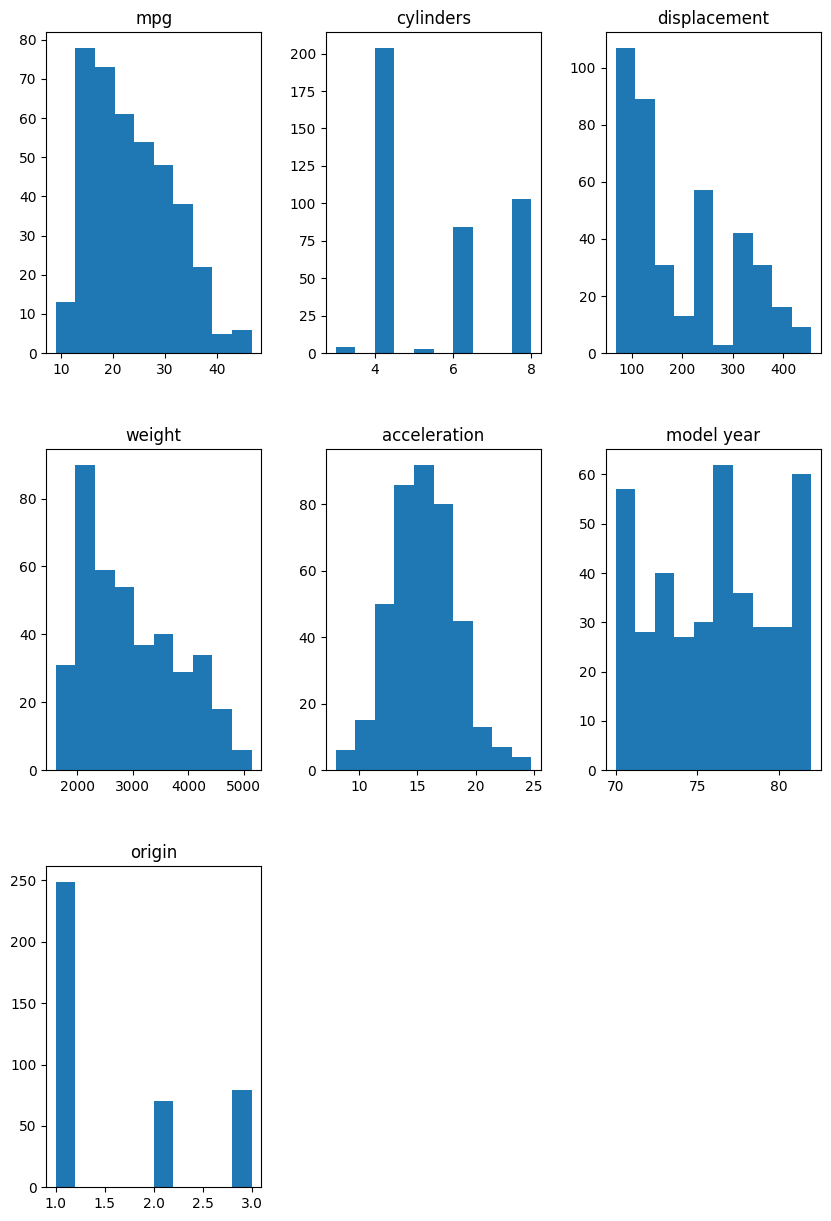

In [ ]:
df.hist(bins=10,grid=False,figsize=(10,15))

In [ ]:
sum(df.horsepower=="?")

6

In [ ]:
df=df[df.horsepower!="?"]

In [ ]:
df.horsepower=df.horsepower.astype("int64")

<ipython-input-8-3598d1547edb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.horsepower=df.horsepower.astype("int64")


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
model year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
origin,392.0,1.576531,0.805518,1.0,1.000,1.00,2.000,3.0


In [ ]:
df["car name"].value_counts()

amc matador            5
ford pinto             5
toyota corolla         5
toyota corona          4
amc hornet             4
                      ..
buick skyhawk          1
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
chevy s-10             1
Name: car name, Length: 301, dtype: int64

In [ ]:
df["car name"].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'plymouth satellite custom', 'ford torino 500', 'amc matador',
       'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900', 'peugeot 304

In [ ]:
df['car name']=df['car name'].replace(['chevrolet','chevy','chevroelt'],'chevrolet')
df['car name']=df['car name'].replace(['volkswagen','vw','vokswagen'],'volkswagen')
df['car name']=df['car name'].replace('maxda','mazda')
df['car name']=df['car name'].replace('toyouta','toyota')
df['car name']=df['car name'].replace('mercedes','mercedes-benz')
df['car name']=df['car name'].replace('nissan','datsun')
df['car name']=df['car name'].replace('capri','ford')

<ipython-input-12-180fc7d84abc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['car name']=df['car name'].replace(['chevrolet','chevy','chevroelt'],'chevrolet')
<ipython-input-12-180fc7d84abc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['car name']=df['car name'].replace(['volkswagen','vw','vokswagen'],'volkswagen')
<ipython-input-12-180fc7d84abc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [ ]:
correlation=df.corr()
correlation

<ipython-input-14-edac34d0c35e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


<Axes: >

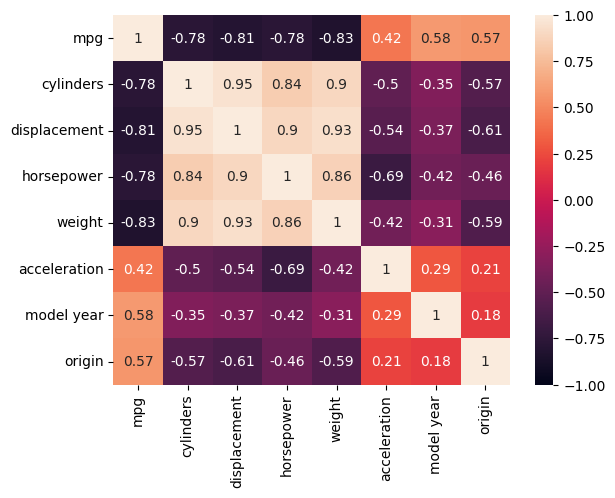

In [ ]:
sns.heatmap(correlation,
            xticklabels=correlation.columns,
            yticklabels=correlation.columns,
            vmax=1,
            vmin=-1,
            annot=True)

In [ ]:
y=df["mpg"]
x=df.drop(columns=["mpg","car name"])



split train and test data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape

(313, 7)

In [ ]:
scaler_x,scaler_y= StandardScaler().fit(x_train.values),StandardScaler().fit(y_train.values.reshape(-1, 1))
x_train_transformed, y_train_transformed = scaler_x.transform(x_train.values),scaler_y.transform(y_train.values.reshape(-1, 1))

x_test_transformed, y_test_transformed =scaler_x.transform(x_test.values),scaler_y.transform(y_test.values.reshape(-1, 1))

In [2]:
x=1j
print(x**2==-1)

True


In [3]:
for i in range(5):
  print(i)
else:
  print("done")

0
1
2
3
4
done


In [9]:
import numpy as np
a=np.array([[1,2],[3,4],[5,6]])
c=a([a>3 & a<11])

ValueError: ignored

In [18]:
table=np.array([[1,2],[3,4],[5,6]])
print(table.max())

6


In [16]:
a=["a","b","c"]
b=["1","2","3"]
c=[(a[i],b[j]) for i,j in a,b]

SyntaxError: ignored

In [ ]:
long
double
int
float
numerical

In [17]:
x=18
if x>10:
  if x>15:
    print("a")
  else:
    print("b")
else:
  print("c")

a


In [15]:
print({x:[y for y in range(1,x) if x%y==0] for x in range(2,100)})

{2: [1], 3: [1], 4: [1, 2], 5: [1], 6: [1, 2, 3], 7: [1], 8: [1, 2, 4], 9: [1, 3], 10: [1, 2, 5], 11: [1], 12: [1, 2, 3, 4, 6], 13: [1], 14: [1, 2, 7], 15: [1, 3, 5], 16: [1, 2, 4, 8], 17: [1], 18: [1, 2, 3, 6, 9], 19: [1], 20: [1, 2, 4, 5, 10], 21: [1, 3, 7], 22: [1, 2, 11], 23: [1], 24: [1, 2, 3, 4, 6, 8, 12], 25: [1, 5], 26: [1, 2, 13], 27: [1, 3, 9], 28: [1, 2, 4, 7, 14], 29: [1], 30: [1, 2, 3, 5, 6, 10, 15], 31: [1], 32: [1, 2, 4, 8, 16], 33: [1, 3, 11], 34: [1, 2, 17], 35: [1, 5, 7], 36: [1, 2, 3, 4, 6, 9, 12, 18], 37: [1], 38: [1, 2, 19], 39: [1, 3, 13], 40: [1, 2, 4, 5, 8, 10, 20], 41: [1], 42: [1, 2, 3, 6, 7, 14, 21], 43: [1], 44: [1, 2, 4, 11, 22], 45: [1, 3, 5, 9, 15], 46: [1, 2, 23], 47: [1], 48: [1, 2, 3, 4, 6, 8, 12, 16, 24], 49: [1, 7], 50: [1, 2, 5, 10, 25], 51: [1, 3, 17], 52: [1, 2, 4, 13, 26], 53: [1], 54: [1, 2, 3, 6, 9, 18, 27], 55: [1, 5, 11], 56: [1, 2, 4, 7, 8, 14, 28], 57: [1, 3, 19], 58: [1, 2, 29], 59: [1], 60: [1, 2, 3, 4, 5, 6, 10, 12, 15, 20, 30], 61: [1],

In [ ]:
class father():
  def __init__(self,name):
    self.name="jeofry"
class son():
  def __init__(self):
    super(father).__init__()
  def get_introduced(self):
    print(f"")

In [21]:
s={1:{"alice":1000},
   2:{"robert":3000}}

s[1]["alice"]=s[2]["robert"]
s

{1: {'alice': 3000}, 2: {'robert': 3000}}

In [ ]:
class LinearRegression(object):
  def __init__(self):
    self.log={}
  def fit_(self,x,y):
    self.w=np.random.randn(x,y)
    self.b=np.random.randn(y,1)

    return self.w,self.b

  def predict_(self,x):
    y_hat=np.multiply(self.w,x)+self.b
    return y_hat
  def loss(self):
    cost=np.mean(np.power((self.y-self.y_hat),2))
    return cost
  def update(self,y,l_r):
    y_minus_yhat=(self.y-self.y_hat)*-1
    dw=np.mean(np.sum(np.dot(y_minus_yhat,self.x)))
    db=np.mean(np.sum(y_minus_yhat))
    dw=self.w-self.l_r*(dw)
    db=self.b-self.l_r*(db)
    return dw,db
  def train(self,l_r,epochs,x,y):
    self.loss=[]
    for i in range(epochs):
      prediction=self.predict_(x)
      error=self.loss()
      self.loss.append(error)
      print(f"Iteration = {i+1}, Loss = {error}")
      update_params=self.update(y,l_r)
    return self.loss,update_params



  #def regularization(self):


In [ ]:
#without gradient
class LinearRegression(object):
  def __init__(self):

    self.w=0
    self.b=0

  def fit_(self,x,y):
    x_x_inv=np.linalg.inv(np.dot(x.T,x))
    x_y=np.dot(x.T,y)
    self.w=np.dot(x_x_inv,x_y)
    self.b=np.random.randn(y,1)

    return self.w,self.b

  def predict_(self,x):
    y_hat=np.multiply(self.w,x)+self.b
    return y_hat

  def loss(self):
    cost=np.mean(np.power((self.y-self.y_hat),2))
    return cost



  #def regularization(self):


SyntaxError: ignored

In [ ]:
l_reg=LinearRegression()

In [ ]:
model=l_reg.fit_(x_train_transformed, y_train_transformed)

TypeError: ignored

In [ ]:
y_pred=model.predict_(x_test_transformed)

NameError: ignored

In [ ]:
weights=

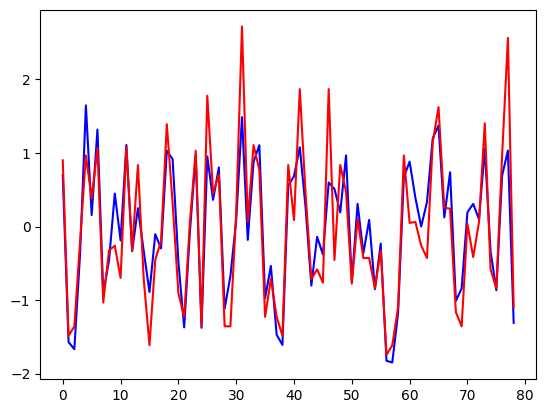

In [ ]:
plt.plot(y_pred,"b")
plt.plot( y_test_transformed ,"r")
plt.show()